In [2]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

In [3]:
# taking csv prepared earlier to explore data 

filepath = "score.csv"
# Read the data into a pandas dataframe called emails

df = pd.read_csv(filepath)

headers = [header for header in df.columns]

print("Successfully loaded {} rows and {} columns!".format(df.shape[0], df.shape[1]))

Successfully loaded 312645 rows and 23 columns!


In [4]:
df.head(1)

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,topemotion
0,Here is our forecast,phillip.allen@enron.com,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,tim.belden@enron.com,NaN,Allen-P,2001,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,fear


#  NRCLex lib for emotion score

In [5]:
from nrclex import NRCLex
# https://pypi.org/project/NRCLex/
'''
NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, 
and is based on the National Research Council Canada (NRC)affect lexicon (see link below) 
and the NLTK library's WordNet synonym sets.
'''

"\nNRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, \nand is based on the National Research Council Canada (NRC)affect lexicon (see link below) \nand the NLTK library's WordNet synonym sets.\n"

In [6]:
def emotion(x):
    text_object = NRCLex(x)
    fear = text_object.affect_frequencies['fear']
    anger = text_object.affect_frequencies['anger']
    anticip = text_object.affect_frequencies['anticip']
    trust = text_object.affect_frequencies['trust']
    surprise = text_object.affect_frequencies['surprise']
    positive = text_object.affect_frequencies['positive']
    negative = text_object.affect_frequencies['negative']
    sadness = text_object.affect_frequencies['sadness']
    disgust = text_object.affect_frequencies['disgust']
    joy = text_object.affect_frequencies['joy']
    topemotion = text_object.top_emotions[0][0]
    return pd.Series([fear, anger, anticip, trust, surprise, positive, negative, sadness, disgust, joy, topemotion], index=['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'topemotion'])

In [6]:
# calling function to get emotion score

#df[['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'topemotion']] = df['email-body'].swifter.apply(lambda x : emotion(x))

'''
already ran function to add score so no need to run again
'''

'\nalready ran in so no need to run again\n'

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
# Function to add time_hour of mail in features

def hr_func(ts):
    return ts.hour


# calling the function
df['time_hour'] = df['Date'].apply(hr_func)

In [10]:
### Function for creating class according to hour of a day
### for employee sending or receiving mails reflecting the stress level for work 

def label (row):
    if 9 <= row <= 17: # working hours of a normal office day-- stress level --- "Low"
        return 'Work'
    elif 17 < row <= 21: # working little late to complete work for the day --stress level--- "Medium"
        return 'Evening'
    elif (21 < row) & (row <= 24): # working really late or whole night --- stress level --- "High"
        return 'Night'
    return 'Night'


In [11]:
## adding the "working-hour" feature by calling the function

df['Work'] = df['time_hour'].apply (lambda row: label(row))


In [12]:
## having a look at new features

df[['topemotion', 'time_hour', 'Work']].head(3)

,topemotion,time_hour,Work
0,fear,23,Night
1,positive,20,Evening
2,anticip,10,Work


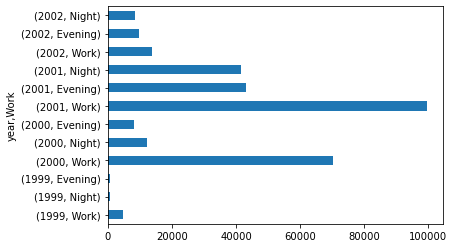

In [13]:
##  Ploting stress level over the years 

df.groupby("year")["Work"].value_counts().plot.barh()

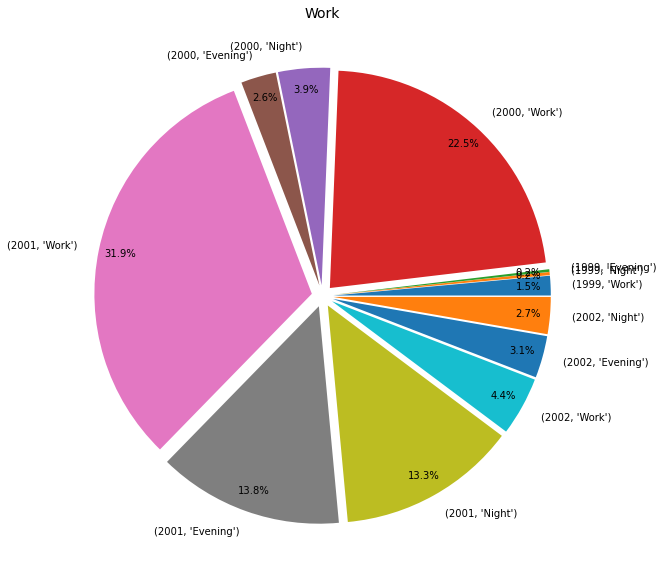

In [15]:
## Plotting the same in Pie chart

data = df.groupby("year")["Work"].value_counts()

pie, ax = plt.subplots(figsize=[16,10])

labels = data.keys()

plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.9)

plt.title("Work", fontsize=14);

In [16]:
### Function for plotting the wordcloud on the basis of sentiment analysis 

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import wordcloud


def WC(Folder, stpwords = None):
    
    data = df.loc[df['X-Folder'] == Folder]
     
    
    stop_words = stopwords.words('english')
    
    list_stpwords = ['enron', 'com', 're', 'RECIPIENTS', 'CN', 'ENRON', 'OU', 'NA', 'Thank', 'mail', 'know', 'get', 'Thanks', 'one', 'let', 'cc', 'bc', 'subject', 'http', 'www', 'hotmail', 'email', 'would', 'back', 'time', 'bcc','new', 'aol', 'Com', 'Original Message','message']
    
    if stpwords is True:
        
         list_stpwords.append(stpwords) 
        
        
    stop_words.extend(list_stpwords)

    subjects = ' '.join(data['email-body'])

    fig, ax = plt.subplots(figsize=(16, 12))

    wc = wordcloud.WordCloud(width=800, 
                             height=600, 
                             max_words=200,
                             stopwords=stop_words).generate(subjects)
    ax.imshow(wc)
    ax.axis("off")
    
    plot = ax.imshow(wc)
    
    return plot

/home/becode/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


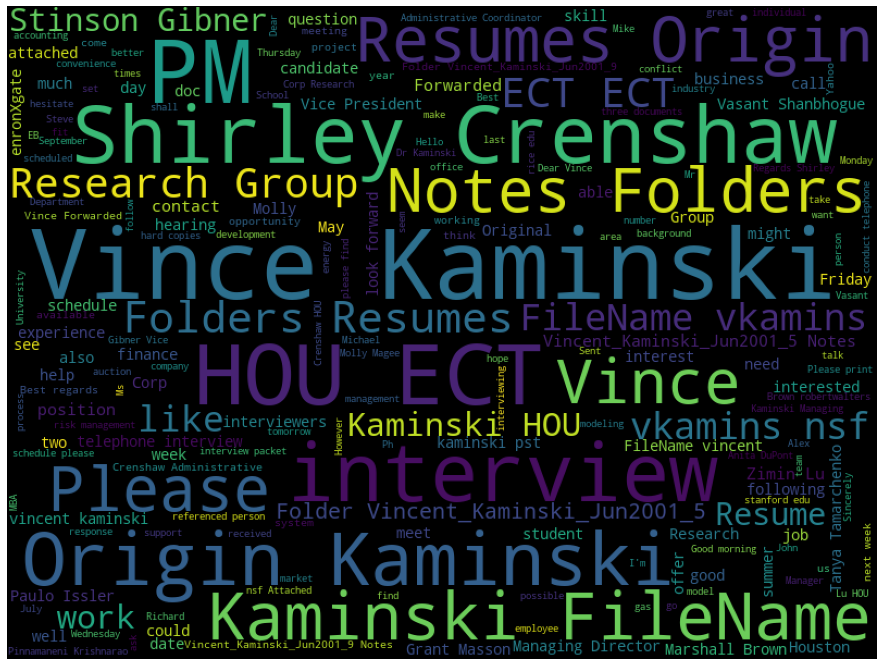

In [17]:
## Calling the function to check how it works

WC('resumes')

In [88]:
df['topemotion'][2185] # 

'negative'

In [138]:
df['email-body'][1020] #6538, 53850, 5200, 420, 2020

'  Please let me know if you still need Curve Shift.  Thanks, Heather -----Original Message----- From: \tAllen, Phillip K. Sent:\tFriday, December 07, 2001 5:14 AM To:\tDunton, Heather Subject:\tRE: West Position  Heather,  Did you attach the file to this email?  -----Original Message----- From: \tDunton, Heather Sent:\tWednesday, December 05, 2001 1:43 PM To:\tAllen, Phillip K.; Belden, Tim Subject:\tFW: West Position  Attached is the Delta position for 1/16, 1/30, 6/19, 7/13, 9/21   -----Original Message----- From: \tAllen, Phillip K. Sent:\tWednesday, December 05, 2001 6:41 AM To:\tDunton, Heather Subject:\tRE: West Position  Heather,  This is exactly what we need.  Would it possible to add the prior day for each of the dates below to the pivot table.  In order to validate the curve shift on the dates below we also need the prior days ending positions.  Thank you,  Phillip Allen  -----Original Message----- From: \tDunton, Heather Sent:\tTuesday, December 04, 2001 3:12 PM To:\tBelden

In [21]:
data = df.groupby("year")["Work"].value_counts(normalize  = True)

In [22]:
data

year  Work   
1999  Work       0.774051
      Night      0.122765
      Evening    0.103184
2000  Work       0.776470
      Night      0.133047
      Evening    0.090483
2001  Work       0.540557
      Evening    0.233727
      Night      0.225716
2002  Work       0.426329
      Evening    0.305316
      Night      0.268355
Name: Work, dtype: float64

In [23]:
### making small datasets for selected  Folder basis to see emotion score for the employees for deployment purpose

HR = df.loc[df['X-Folder'] == 'hr']
KPMG = df.loc[df['X-Folder'] == 'kpmg']
Management = df.loc[df['X-Folder'] == 'management']
Resume = df.loc[df['X-Folder'] == 'resumes']
IT = df.loc[df['X-Folder'] == 'it']
Friends = df.loc[df['X-Folder'] == 'myfriends']
Personal = df.loc[df['X-Folder'] == 'personalfolder']
Interviews = df.loc[df['X-Folder'] == 'interviews']
Federal = df.loc[df['X-Folder'] == 'federal legislation']
Personal2 = df.loc[df['X-Folder'] == 'personal']


    

In [24]:
Personal2 = df.loc[df['X-Folder'] == 'personal']
Personal2.to_csv('prsnl.csv', index = False)


In [153]:
fun =  df.loc[df['X-Folder'] == 'fun emails']

In [80]:
HR.to_csv('hr.csv', index=False)
KPMG.to_csv('kpmg.csv', index=False)
Management.to_csv('management.csv', index=False)
Resume.to_csv('resume.csv', index=False)
IT.to_csv('it.csv', index=False)
Friends.to_csv('friends.csv', index=False)
Personal.to_csv('personal.csv', index=False)
Interviews.to_csv('interview.csv', index=False)
Federal.to_csv('federal.csv', index = False)



In [25]:
HR.Work.value_counts(normalize=True)

Night      0.432432
Evening    0.389189
Work       0.178378
Name: Work, dtype: float64

In [26]:
## Selected folders for deployment purpose

Folder_selected = ['hr', 'kpmg', 'management', 'resume', 'it', 'friends', 'personalfolder', 'interview', 'federal', 'personal']

In [146]:
## 148044 ---91
Federal['email-body'][148048]

'X-cc: Joe Hartsoe, Sarah Novosel, Chris Long, Tom Briggs, Stephen D Burns X-bcc: X-Folder: \\Steven_Kean_Dec2000_1\\Notes Folders\\Federal legislation X-Origin: KEAN-S X-FileName: skean.nsf  Hi guys, per my e-mail yesterday, the House believes they still have a 40% chance to pass a comprehensive bill this Congress.  Joe Hartsoe, Charles Ingebretson and myself will attend today\'s meeting referenced below and report back.  Other participants include TXU, Unicom, APPA, NARUC, Southern Company, etc. (Watkiss is on a plane, we were just notified of this meeting at 10 am this morning.)  We\'ll report back. ---------------------- Forwarded by Cynthia Sandherr/Corp/Enron on 07/19/2000 02:54 PM ---------------------------   "Black, Andy" <andy.black@mail.house.gov> on 07/19/2000 12:05:56 PM To: Cynthia Sandherr <Cynthia_Sandherr@enron.com> cc:  Subject: FW: Electric Restructuring Transmission Work Group     > I\'m trying to send this message individually to overcome House > distribution probl

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work


In [29]:
### making one common dataset for all selected folders

df_folder = pd.concat(map(pd.read_csv, ['folder/hr.csv', 'folder/kpmg.csv','folder/it.csv', 'folder/resume.csv', 'folder/management.csv', 'folder/friends.csv', 'folder/personal.csv', 'folder/interview.csv', 'folder/federal.csv', 'folder/prsnl.csv']))

In [30]:
df_folder.shape

(2725, 25)

In [31]:
df_folder.head(2)

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
0,"mary.solmonson@enron.com, martha.stevens@enron.com, robert.superty@enron.com, edward.terry@enron...",hector.mcloughlin@enron.com,beck-s,2001-04-04 01:52:00+00:00,Action Request,hr,"sally.beck@enron.com, thresa.allen@enron.com, bryce.baxter@enron.com, \n\tlinda.bryan@enron.com,...","Sunjay Arya <Sunjay Arya/ENRON@enronXgate>, John Blaylock <John Blaylock/ENRON@enronXgate>, Fran...",BECK-S,2001,...,0.113872,0.086957,0.118012,0.113872,0.095238,0.095238,0.086957,positive,1,Night
1,"Content-Transfer-Encoding: 7bit Bcc: exec.jones@enron.com, tim.o'rourke@enron.com, mary.joyce@en...",david.oxley@enron.com,kean-s,2001-12-05 17:20:42+00:00,New HR Contacts - post headcount reduction,hr,"kenneth.lay@enron.com, greg.whalley@enron.com, jim.fallon@enron.com, \n\tjohn.lavorato@enron.com...","Jones, Robert W.- HR Exec </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rjones2>, O'rourke, Tim </O=ENRON/OU=...",Harris-S,2001,...,0.108642,0.083951,0.111111,0.113580,0.098765,0.093827,0.091358,negative,17,Work


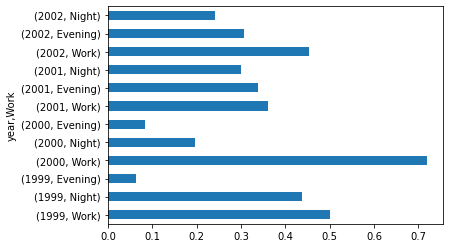

In [32]:
##  Ploting stress level over the years ---- (plotly)

df_folder.groupby("year")["Work"].value_counts(normalize = True).plot.barh()

In [90]:
## making csv for subset of folder file for deployment

df_folder.to_csv('df_folder.csv', index = False)

In [33]:
## making  wordcloud universal function only for selected folders 

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import wordcloud


def WC_Folder(Folder, stpwords = None):
    
    data = df_folder.loc[df_folder['X-Folder'] == Folder]
     
    
    stop_words = stopwords.words('english')
    
    list_stpwords = ['enron', 'com', 're', 'RECIPIENTS', 'CN', 'ENRON', 'OU', 'NA', 'Thank', 'mail', 'know', 'get', 'Thanks', 'one', 'let', 'cc', 'bc', 'subject', 'http', 'www', 'hotmail', 'email', 'would', 'back', 'time', 'bcc','new', 'aol', 'Com', 'Original Message','message']
    
    if stpwords is True:
        
         list_stpwords.append(stpwords) 
        
        
    stop_words.extend(list_stpwords)

    subjects = ' '.join(data['email-body'])

    fig, ax = plt.subplots(figsize=(16, 12))

    wc = wordcloud.WordCloud(width=800, 
                             height=600, 
                             max_words=200,
                             stopwords=stop_words).generate(subjects)
    ax.imshow(wc)
    ax.axis("off")
    
    plot = ax.imshow(wc)
    
    return plot

In [35]:
import plotly.express as px
import plotly.graph_objects as go

In [139]:
#fig = go.Figure(go.Scattergl(IT, x = 'time_hour', y = 'topemotion', title='Emotion hourly based work '))



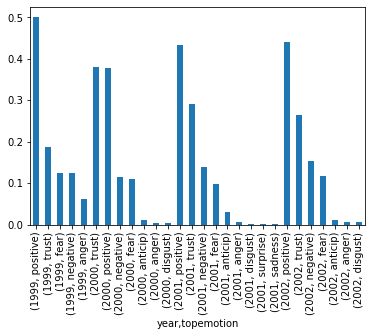

In [36]:
df_folder.groupby("year")["topemotion"].value_counts(normalize = True).plot.bar()

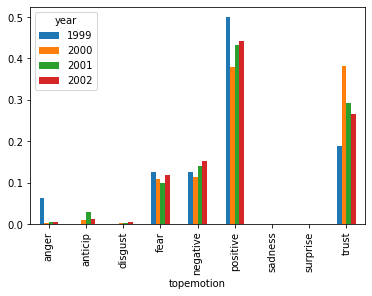

In [37]:
df_folder.groupby('year').topemotion.value_counts(normalize= True).unstack(0).plot.bar()

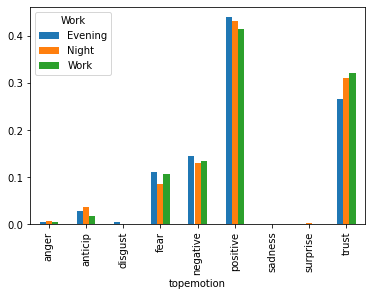

In [38]:
df_folder.groupby('Work').topemotion.value_counts(normalize = True).unstack(0).plot.bar()

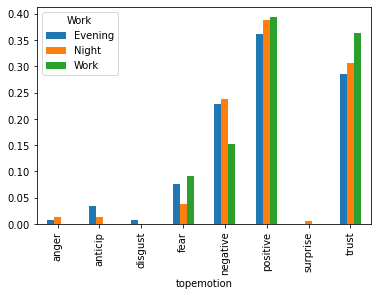

In [39]:
HR.groupby('Work').topemotion.value_counts(normalize = True).unstack(0).plot.bar()

In [ ]:
def plot(Folder):
    
    data = df_folder.loc[df_folder['X-Folder'] == Folder]
    
    data.groupby('year').topemotion.value_counts(normalize = True).unstack(0).plot.bar()
    
    data.groupby('year').time_hour.value_counts(normalize = True).unstack(0).plot.bar()
    
    data.groupby('year').Work.value_counts(normalize = True).unstack(0).plot.bar()
    

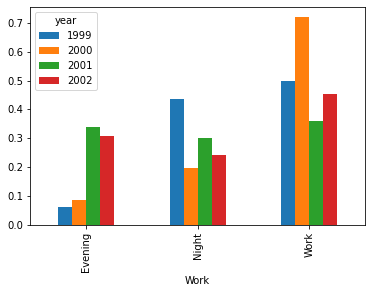

In [211]:
df_folder.groupby('year').Work.value_counts(normalize = True).unstack(0).plot.bar()

In [152]:
a =df.sort_values(by = ['disgust'], ascending=False).head()

In [180]:
b = df[df['topemotion'] == 'positive']

In [181]:
b.sort_values(by = ['positive'], ascending=False).head(8)

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
68762,X-Folder: \Darren_Farmer_Dec2000\Notes Folders\Discussion threads X-Origin: Farmer-D X-FileName:...,timpowell@txu.com,farmer-d,2000-06-05 10:41:00+00:00,"ENRON ACTUALS FOR JUNE 02 THRU 04, 2000",discussion threads,"daren.j.farmer@enron.com, crodrig@ect.enron.com, mjones7@txu.com, \n\tcstone1@txu.com, ggreen2@t...",NaN,Farmer-D,2000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,10,Work
173766,X-bcc: X-Folder: \Michelle_Lokay_Dec2000_June2001_1\Notes Folders\Discussion threads X-Origin: L...,richard.abramowicz@enron.com,lokay-m,2000-07-20 13:04:00+00:00,updated ios participants,discussion threads,"toby.kuehl@enron.com, christine.stokes@enron.com, \n\tlorraine.lindberg@enron.com, jeffery.fawce...",Girish Kaimal,LOKAY-M,2000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,13,Work
181159,"yep whats up -----Original Message----- From: \tNelson, Michelle Sent:\tMonday, January 07, 20...",mike.maggi@enron.com,maggi-m,2002-01-07 16:06:42+00:00,RE:,deleted items,michelle.nelson@enron.com,NaN,MAGGI-M,2002,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,16,Work
173775,X-bcc: X-Folder: \Michelle_Lokay_Dec2000_June2001_1\Notes Folders\Discussion threads X-Origin: L...,richard.abramowicz@enron.com,lokay-m,2000-07-21 09:45:00+00:00,More updates - ios participants,discussion threads,"toby.kuehl@enron.com, christine.stokes@enron.com, \n\tlorraine.lindberg@enron.com, jeffery.fawce...",Girish Kaimal,LOKAY-M,2000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,9,Work
29639,X-FileName: MCASH (Non-Privileged).pst The Rome mediation scheduled for Thursday has been cance...,lizzette.palmer@enron.com,cash-m,2001-11-27 19:34:34+00:00,RE: Bill Rome Mediation,deleted items,"michelle.cash@enron.com, a..howard@enron.com, diane.goode@enron.com, \n\tjeanie.slone@enron.com",NaN,Cash-M,2001,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,19,Evening
249269,Attached is my response. Sara,sara.shackleton@enron.com,shackleton-s,2000-08-28 10:23:00+00:00,tokyo-mitsubishi,all documents,"larry.hunter@enron.com, souad.mahmassani@enron.com",NaN,SHACKLETON-S,2000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,10,Work
68330,X-Folder: \DFARMER (Non-Privileged)\Deleted Items X-Origin: FARMER-D X-FileName: DFARMER (Non-Pr...,ann.chance@enron.com,farmer-d,2001-10-19 19:32:41+00:00,Logistics Issues Log,deleted items,"robert.superty@enron.com, lisa.kinsey@enron.com, victor.lamadrid@enron.com, \n\tpatti.sullivan@e...","Wynne, Rita </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rwynne>, Mcclure, Mark </O=ENRON/OU=NA/CN=RECIPIENT...",FARMER-D,2001,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,19,Evening
53359,Thanks for dinner. Very yummy.,jeff.dasovich@enron.com,dasovich-j,2001-12-13 18:40:13+00:00,NaN,sent items,cameron@perfect.com,NaN,Dasovich-J,2001,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive,18,Evening


In [47]:
HR.employee.value_counts()

kitchen-l      303
williams-w3     60
kean-s           6
beck-s           1
Name: employee, dtype: int64

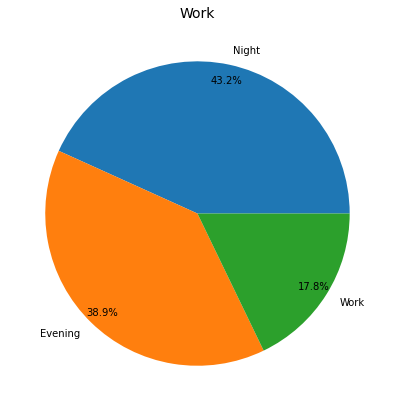

In [53]:
## Plotting the same in Pie chart

dat = HR["Work"].value_counts(normalize = True)

pie, ax = plt.subplots(figsize=[12,7])

labels = dat.keys()

plt.pie(x=dat, autopct="%.1f%%", labels=labels, pctdistance=0.9)

plt.title("Work", fontsize=14);

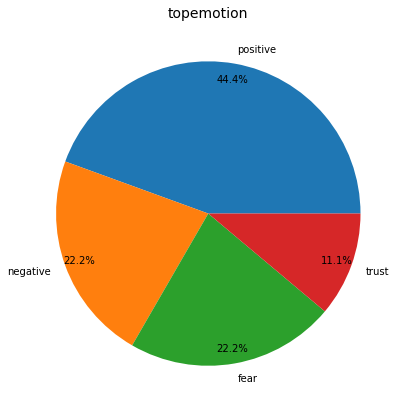

In [207]:
## Plotting the same in Pie chart

dat = fun["topemotion"].value_counts(normalize = True)

pie, ax = plt.subplots(figsize=[13,7])

labels = dat.keys()

plt.pie(x=dat, autopct="%.1f%%", labels=labels, pctdistance=0.9)

plt.title("topemotion", fontsize=14);

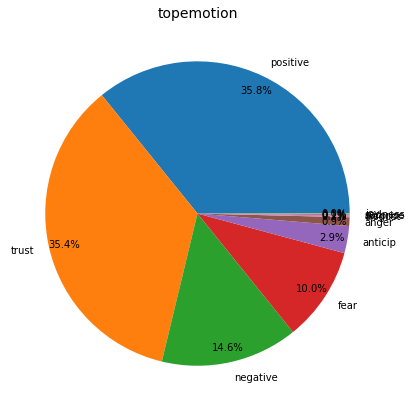

In [208]:
## Plotting the same in Pie chart

dat = df["topemotion"].value_counts(normalize = True)

pie, ax = plt.subplots(figsize=[13,7])

labels = dat.keys()

plt.pie(x=dat, autopct="%.1f%%", labels=labels, pctdistance=0.9)

plt.title("topemotion", fontsize=14);

### finding some cool mails to show wordcloud

In [205]:
fun['email-body'][243482] # 75-82

'X-cc: X-bcc: X-Folder: \\Susan_Scott_Dec2000_June2001_2\\Notes Folders\\Fun emails X-Origin: SCOTT-S X-FileName: sscott5.nsf  Ah - these are hilarious.    '

In [163]:
fun['topemotion'][243481]

'positive'

In [172]:
family =  df.loc[df['X-Folder'] == 'family']

In [194]:
family['email-body'][55782]

" Dana,  Just wanted to say that I really miss you.  It saddens me that you are not sitting next to me anymore.  Although I know that we are still friends, you have been so much more.  I have grown spiritually because of your teaching.  I'm not sure what to say, except:  I REALLY MISS YOU!!!!   Carolyn H. Ashley Training & Development Manager Port of Houston Authority Phone:  (713) 670-2619 Fax:  (713) 670-2457 E-mail:  cashley@poha.com"

In [ ]:
55779-82, 163235-38--- panda

In [199]:
df['email-body'][5200] #6538, 53850, 5200, 420, 2020

' Any ideas on who to refer this to?  -----Original Message----- From: Paul Jacobi [mailto:pjacob@wexford.com] Sent: Wednesday, March 06, 2002 9:57 AM To: Miroballi, Angelo Cc: Michael Burner (E-mail) Subject: Swap Termination   As discussed last night, we have issued a termination notice on swap YD2437.1.  Can you please provide let me know who I can deal with at Enron with regards to our o/s letter of credit on this swap.  I would appreciate your assistance on this matter.  Regards,  Paul Jacobi Phone (203) 862-7074 Fax    (203) 862-7374 Email pjacob@wexford.com'

In [ ]:
family =  df.loc[df['X-Folder'] == 'family']
family['email-body'][163235] ## having a grandchild
family['email-body'][55782] # missing someone 
df['email-body'][2020] # its from bigger dataset
df['email-body'][6538]

In [221]:
import matplotlib.pyplot as plt

In [256]:
#total =  df[['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']].sum()
total = df['topemotion'].value_counts()

In [257]:
total

positive    111973
trust       110749
negative     45530
fear         31294
anticip       8996
anger         2888
disgust        624
surprise       371
sadness        214
joy              6
Name: topemotion, dtype: int64

In [223]:
emotion =  df[['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']]

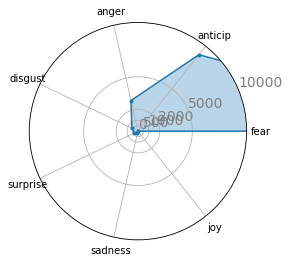

In [269]:
# calculate evenly spaced angle coordinates
# use radians for polar plot with 2xnp.pi
import numpy as np
from skimage import io
from math import pi

#categories = ['positive', 'trust', 'negative', 'fear', 'anticip', 'anger', 'disgust', 'surprise', 'sadness', 'joy']
categories = ['fear', 'anticip', 'anger', 'disgust', 'surprise', 'sadness', 'joy']


N = len(categories)

values = [31294, 8996, 2888, 624, 371, 214, 6]
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
          

plt.polar(angles, values, marker='.')
plt.fill(angles, values, alpha=0.3)
plt.xticks(angles[:-1], categories)

#ax.subset_rlabel_position(0)
plt.yticks([0, 500, 1000, 2000, 5000, 10000], ["0", "500", "1000", "2000", "5000", "10000"], color="grey", size=14)
plt.ylim(0,10000)


plt.show()


In [234]:
values = total(keys)

NameError: name 'keys' is not defined